In [5]:
from functools import partial
import itertools
import json
from pathlib import Path
import re
import sys
sys.path.append("../src")

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as io
import scipy.stats as st
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from tqdm import tqdm, tqdm_notebook

%matplotlib inline
sns.set(style="whitegrid", context="paper", font_scale=3, rc={"lines.linewidth": 2})
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
#set_matplotlib_formats('svg')

%load_ext autoreload
%autoreload 2
import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
brains_path = Path("../data/brains")

In [3]:
PCA_DIM = 256

In [6]:
pca_results = []
for brain_el in tqdm_notebook(list(brains_path.iterdir())):
    if not brain_el.is_dir(): continue
    
    images = io.loadmat(brain_el / "examples_384sentences.mat")["examples"]
    pca = PCA(PCA_DIM).fit(images)
    
    subject_name = brain_el.name
    pca_results.append((subject_name, sum(pca.explained_variance_ratio_)))

In [7]:
pca_results = pd.DataFrame(pca_results, columns=["subject", "explained_variance"])
pca_results

,subject,explained_variance
0,M02,0.963260
1,M04,0.970155
2,M07,0.965320
3,M08,0.978509
4,M09,0.974115
5,M14,0.982325
6,M15,0.975107
7,P01,0.950888


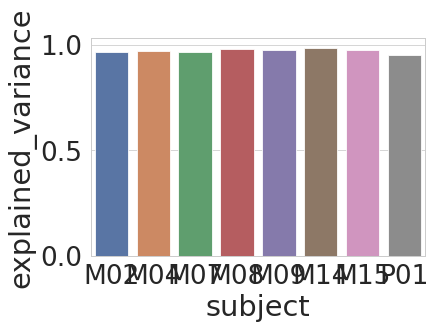

In [9]:
sns.barplot(data=pca_results.sort_values("subject"), x="subject", y="explained_variance")